## Tutorial 9

In this tutorial, I am going to use data set of Tutorial 8 that is mall customers data to explain the Hierarchical clustering model with Python. We have a dataset consist of 200 customers.The data frame includes the customerID, genre, age, annual income and spending score of each customer.Spending
score is between 1–100. What makes a business problem a clustering problem because we don’t know what the answers are. We don’t know the final categories for the data. So that our target is to find some unknown clusters of the customers.

###  Importing the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch #importing hierarchy clustering tool from Scipy
from sklearn.cluster import AgglomerativeClustering  

### Importing the Mall_Customers dataset by pandas 

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = dataset.iloc[: , 3:5].values #get all the values from column 3 and 4. Note we passed the ending index as n+1 i.e 4+1 =5.

In [4]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In hierarchical clustering, this new step also consists of finding the optimal number of clusters. Instead of using elbow method which we used in Kmeans Clustering we  are going to use the dendrogram. Let's make a dendogram with the use of Scipy hierarchy class.

### Using Method as complete :largest distance between an element in one cluster and an element in the other 

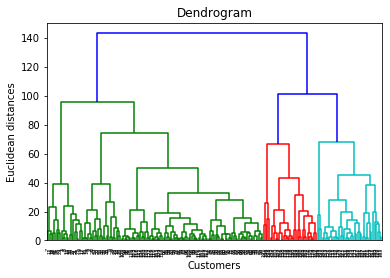

In [5]:
#Lets create a dendrogram variable linkage is actually the algorithm 
#itself of hierarchical clustering and then in linkage we have to 
#specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

How do we determine the optimal number of clusters from this diagram? We look for the largest distance that we can vertically without crossing any horizontal line. Let's count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 5 for this dataset.

In [6]:
#4 Fitting hierarchical clustering to the Mall_Customes dataset
#There are two algorithms for hierarchical clustering: 
#Agglomerative Hierarchical Clustering and 
#Divisive Hierarchical Clustering. We choose Euclidean distance and complete method for our algorithm class.
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')
# Lets try to fit the hierarchical clustering algorithm  to dataset 
#X while creating the clusters vector that tells for each customer 
#which cluster the customer belongs to.
complete=hc.fit_predict(X)

In [7]:
complete #shows the labels of each data point to its cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

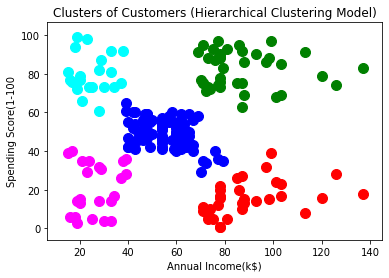

In [8]:
#5 Visualizing the clusters. This code is similar to k-means visualization code.
#I only replace the y_kmeans vector name to #y_hc for the hierarchical clustering
plt.scatter(X[complete==0, 0], X[complete==0, 1], s=100, c='green', label ='Cluster 1')
plt.scatter(X[complete==1, 0], X[complete==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[complete==2, 0], X[complete==2, 1], s=100, c='red', label ='Cluster 3')
plt.scatter(X[complete==3, 0], X[complete==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[complete==4, 0], X[complete==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

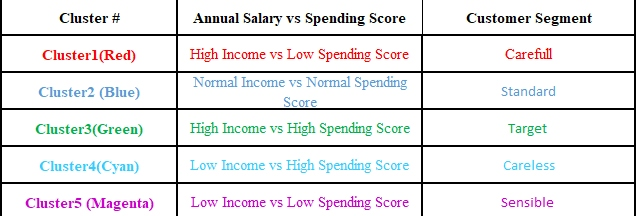

In [9]:
from IPython.display import Image
Image(filename='results.jpg')

### Using Method as average : average distance between an element in one cluster and an element in the other


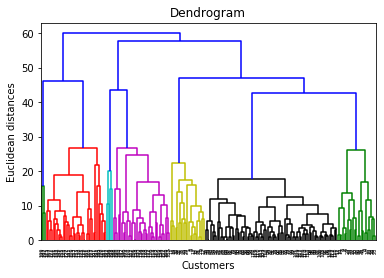

In [10]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

By seeing the dendogram we choose the optimal value of clusters as 3

In [11]:
#4 Fitting hierarchical clustering to the Mall_Customes dataset with method/linkage = average
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')
# Lets try to fit the hierarchical clustering algorithm  to dataset 
#X while creating the clusters vector that tells for each customer 
#which cluster the customer belongs to.
y_hc=hc.fit_predict(X)

In [13]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

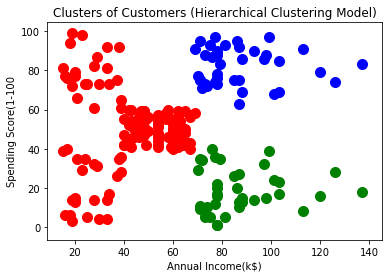

In [12]:
#5 Visualizing the clusters. This code is similar to k-means visualization code.
#I only replace the y_kmeans vector name to #y_hc for the hierarchical clustering
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

## END 